In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### DataFrame Loading and Cleaning

In [2]:
raw_data = pd.read_csv('sgcarmart_used_cars_prices.csv',index_col=0)
raw_data.head()

,LISTING_URL,MAKE,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,ENGINE_CAP_CC,MILEAGE_KM,VEHICLE_TYPE
0,https://www.sgcarmart.com/used_cars/info.php?I...,Kia,61800,8120.0,24-Apr-2017,1591,65000.0,Mid-Sized Sedan
1,https://www.sgcarmart.com/used_cars/info.php?I...,Subaru,60800,8810.0,26-Aug-2016,1600,82740.0,SUV
2,https://www.sgcarmart.com/used_cars/info.php?I...,BMW,72777,7300.0,25-Jan-2011,2497,149563.0,Luxury Sedan
3,https://www.sgcarmart.com/used_cars/info.php?I...,Volvo,48800,9990.0,20-Jun-2014,1560,120000.0,Luxury Sedan
4,https://www.sgcarmart.com/used_cars/info.php?I...,Toyota,58800,8800.0,06-Apr-2016,1598,49980.0,Mid-Sized Sedan


In [3]:
raw_data.columns

Index(['LISTING_URL', 'MAKE', 'PRICE', 'DEPRE_VALUE_PER_YEAR', 'REG_DATE',
       'ENGINE_CAP_CC', 'MILEAGE_KM', 'VEHICLE_TYPE'],
      dtype='object')

In [4]:
raw_data.describe(include='all')

,LISTING_URL,MAKE,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,ENGINE_CAP_CC,MILEAGE_KM,VEHICLE_TYPE
count,400,400,400.000000,392.000000,398,400.000000,327.000000,400
unique,400,32,NaN,NaN,364,NaN,NaN,7
top,https://www.sgcarmart.com/used_cars/info.php?I...,Toyota,NaN,NaN,08-Sep-2010,NaN,NaN,Luxury Sedan
freq,1,82,NaN,NaN,3,NaN,NaN,86
mean,NaN,NaN,84768.027500,12085.816327,NaN,1919.002500,76319.155963,NaN
std,NaN,NaN,71598.151359,12127.780303,NaN,689.978204,48895.819344,NaN
min,NaN,NaN,4999.000000,4560.000000,NaN,989.000000,5.000000,NaN
25%,NaN,NaN,47325.000000,7760.000000,NaN,1497.750000,39800.000000,NaN
50%,NaN,NaN,67800.000000,9500.000000,NaN,1598.000000,70000.000000,NaN
75%,NaN,NaN,96800.000000,13330.000000,NaN,1998.000000,108000.000000,NaN


In [5]:
# Dropping column with high unique number
data = raw_data.drop(['LISTING_URL','REG_DATE'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MAKE                  400 non-null    object 
 1   PRICE                 400 non-null    int64  
 2   DEPRE_VALUE_PER_YEAR  392 non-null    float64
 3   ENGINE_CAP_CC         400 non-null    int64  
 4   MILEAGE_KM            327 non-null    float64
 5   VEHICLE_TYPE          400 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 21.9+ KB


In [6]:
# Dropping the null values or missing values
data_no_mv = data.dropna(axis=0)
data_no_mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 399
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MAKE                  322 non-null    object 
 1   PRICE                 322 non-null    int64  
 2   DEPRE_VALUE_PER_YEAR  322 non-null    float64
 3   ENGINE_CAP_CC         322 non-null    int64  
 4   MILEAGE_KM            322 non-null    float64
 5   VEHICLE_TYPE          322 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 17.6+ KB


In [7]:
data_no_mv.describe(include='all')

,MAKE,PRICE,DEPRE_VALUE_PER_YEAR,ENGINE_CAP_CC,MILEAGE_KM,VEHICLE_TYPE
count,322,322.000000,322.000000,322.000000,322.000000,322
unique,31,NaN,NaN,NaN,NaN,7
top,Toyota,NaN,NaN,NaN,NaN,Luxury Sedan
freq,51,NaN,NaN,NaN,NaN,77
mean,NaN,87293.220497,11855.496894,1914.736025,75904.826087,NaN
std,NaN,68367.562222,6285.193343,702.899927,47960.916277,NaN
min,NaN,9000.000000,4560.000000,989.000000,18.000000,NaN
25%,NaN,51650.000000,7972.500000,1498.000000,40250.000000,NaN
50%,NaN,69800.000000,9995.000000,1598.000000,70000.000000,NaN
75%,NaN,99572.000000,13852.500000,1997.750000,107500.000000,NaN


#### Data Visualization

In [8]:
# View the correlations
data_no_mv.corr()

,PRICE,DEPRE_VALUE_PER_YEAR,ENGINE_CAP_CC,MILEAGE_KM
PRICE,1.000000,0.900054,0.726566,-0.475616
DEPRE_VALUE_PER_YEAR,0.900054,1.000000,0.775681,-0.319794
ENGINE_CAP_CC,0.726566,0.775681,1.000000,-0.077500
MILEAGE_KM,-0.475616,-0.319794,-0.077500,1.000000


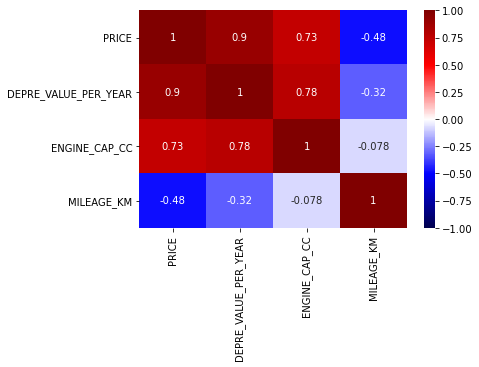

In [9]:
sns.heatmap(data_no_mv.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

Based on the correlation matrix, there is no high correlation between feature to feature. Therefore no feature is removed.

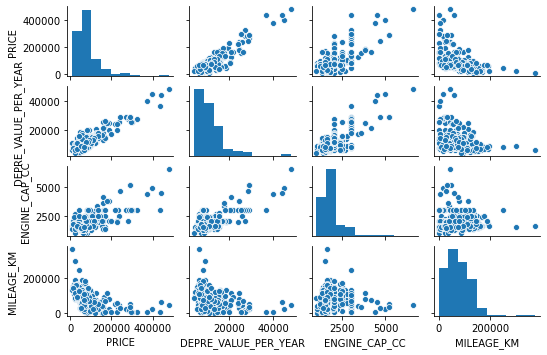

In [10]:
sns.pairplot(data_no_mv, height=1.2, aspect=1.5);

In [11]:
# fit and summarize in statsmodels
lsm = smf.ols('PRICE ~ DEPRE_VALUE_PER_YEAR + ENGINE_CAP_CC + MILEAGE_KM', data = data_no_mv)
fit1 = lsm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     654.4
Date:                Thu, 17 Sep 2020   Prob (F-statistic):          1.14e-135
Time:                        18:30:40   Log-Likelihood:                -3723.9
No. Observations:                 322   AIC:                             7456.
Df Residuals:                     318   BIC:                             7471.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -7642.9409   4923.592     -1.552      0.122   -1.73e+04    2043.990
DEPRE_VALUE_PER_YEAR     7.4692      0.396     18.854      0.000       6.690       8.249
ENGINE_CAP_CC           17.0354      3.367      5.060      0.000      10.412      23.659
MILEAGE_KM              -0.3456      0.033    -10.516      0.000      -0.410      -0.281
==============================================================================
Omnibus:                       23.665   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.289
Skew:                           0.035   Prob(JB):                     1.83e-19
Kurtosis:                       5.535   Cond. No.                     3.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# take log of price as target.
lsm = smf.ols('np.log(PRICE) ~ DEPRE_VALUE_PER_YEAR + ENGINE_CAP_CC + MILEAGE_KM', data = data_no_mv)
fit1 = lsm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(PRICE)   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     290.1
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           1.15e-90
Time:                        18:30:41   Log-Likelihood:                -104.60
No. Observations:                 322   AIC:                             217.2
Df Residuals:                     318   BIC:                             232.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.7466      0.065    166.128      0.000      10.619      10.874
DEPRE_VALUE_PER_YEAR  3.916e-05    5.2e-06      7.524      0.000    2.89e-05    4.94e-05
ENGINE_CAP_CC            0.0002   4.42e-05      5.303      0.000       0.000       0.000
MILEAGE_KM           -6.573e-06   4.32e-07    -15.223      0.000   -7.42e-06   -5.72e-06
==============================================================================
Omnibus:                       55.492   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.931
Skew:                          -0.919   Prob(JB):                     3.66e-24
Kurtosis:                       5.160   Cond. No.                     3.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# log-transform the mileage.  
lsm = smf.ols('PRICE ~ DEPRE_VALUE_PER_YEAR + ENGINE_CAP_CC + np.log(MILEAGE_KM)', data = data_no_mv)
fit1 = lsm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     751.3
Date:                Thu, 17 Sep 2020   Prob (F-statistic):          6.09e-144
Time:                        18:30:42   Log-Likelihood:                -3704.6
No. Observations:                 322   AIC:                             7417.
Df Residuals:                     318   BIC:                             7432.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.636e+05   1.59e+04     10.262      0.000    1.32e+05    1.95e+05
DEPRE_VALUE_PER_YEAR     7.3177      0.370     19.792      0.000       6.590       8.045
ENGINE_CAP_CC           18.9153      3.179      5.951      0.000      12.661      25.169
np.log(MILEAGE_KM)   -1.821e+04   1417.194    -12.852      0.000    -2.1e+04   -1.54e+04
==============================================================================
Omnibus:                       46.742   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.250
Skew:                          -0.696   Prob(JB):                     5.71e-26
Kurtosis:                       5.593   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Applying log to desired feature
data_transform = data_no_mv.copy()
data_transform['MILEAGE_KM'] = data_no_mv['MILEAGE_KM'].apply(np.log)

# Renaming feature
data_transform.rename(columns={'MILEAGE_KM':'LOG_MILEAGE_KM'},inplace=True)

In [15]:
data_transform.columns

Index(['MAKE', 'PRICE', 'DEPRE_VALUE_PER_YEAR', 'ENGINE_CAP_CC',
       'LOG_MILEAGE_KM', 'VEHICLE_TYPE'],
      dtype='object')

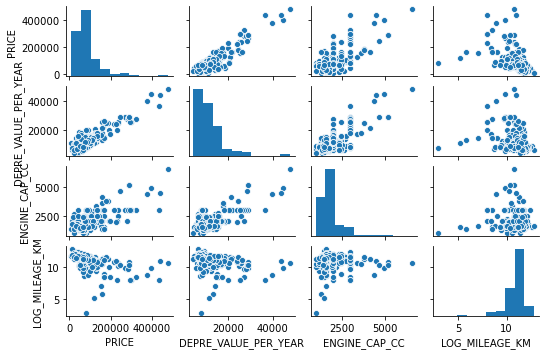

In [16]:
sns.pairplot(data_transform, height=1.2, aspect=1.5);

#### Creating Dummy Variables

In [17]:
data_transform_with_dummy = pd.get_dummies(data_transform, drop_first = True) #can just apply it to the whole df
data_transform_with_dummy.head()

,PRICE,DEPRE_VALUE_PER_YEAR,ENGINE_CAP_CC,LOG_MILEAGE_KM,MAKE_BMW,MAKE_Chevrolet,MAKE_Chrysler,MAKE_Citroen,MAKE_Ferrari,MAKE_Ford,...,MAKE_Suzuki,MAKE_Toyota,MAKE_Volkswagen,MAKE_Volvo,VEHICLE_TYPE_Luxury Sedan,VEHICLE_TYPE_MPV,VEHICLE_TYPE_Mid-Sized Sedan,VEHICLE_TYPE_SUV,VEHICLE_TYPE_Sports Car,VEHICLE_TYPE_Stationwagon
0,61800,8120.0,1591,11.082143,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,60800,8810.0,1600,11.323458,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,72777,7300.0,2497,11.915473,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,48800,9990.0,1560,11.695247,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,58800,8800.0,1598,10.819378,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [18]:
data_transform_with_dummy.columns

Index(['PRICE', 'DEPRE_VALUE_PER_YEAR', 'ENGINE_CAP_CC', 'LOG_MILEAGE_KM',
       'MAKE_BMW', 'MAKE_Chevrolet', 'MAKE_Chrysler', 'MAKE_Citroen',
       'MAKE_Ferrari', 'MAKE_Ford', 'MAKE_Honda', 'MAKE_Hyundai',
       'MAKE_Jaguar', 'MAKE_Jeep', 'MAKE_Kia', 'MAKE_Lamborghini',
       'MAKE_Lexus', 'MAKE_MINI', 'MAKE_Maserati', 'MAKE_Mazda',
       'MAKE_Mercedes-Benz', 'MAKE_Mitsubishi', 'MAKE_Nissan', 'MAKE_Perodua',
       'MAKE_Peugeot', 'MAKE_Porsche', 'MAKE_Renault', 'MAKE_Rolls-Royce',
       'MAKE_Skoda', 'MAKE_Subaru', 'MAKE_Suzuki', 'MAKE_Toyota',
       'MAKE_Volkswagen', 'MAKE_Volvo', 'VEHICLE_TYPE_Luxury Sedan',
       'VEHICLE_TYPE_MPV', 'VEHICLE_TYPE_Mid-Sized Sedan', 'VEHICLE_TYPE_SUV',
       'VEHICLE_TYPE_Sports Car', 'VEHICLE_TYPE_Stationwagon'],
      dtype='object')

In [19]:
# renaming the features

data_transform_with_dummy.rename(columns=lambda name: name.replace("-", "_").replace(" ", "_"), inplace=True)

In [20]:
data_transform_with_dummy.columns

Index(['PRICE', 'DEPRE_VALUE_PER_YEAR', 'ENGINE_CAP_CC', 'LOG_MILEAGE_KM',
       'MAKE_BMW', 'MAKE_Chevrolet', 'MAKE_Chrysler', 'MAKE_Citroen',
       'MAKE_Ferrari', 'MAKE_Ford', 'MAKE_Honda', 'MAKE_Hyundai',
       'MAKE_Jaguar', 'MAKE_Jeep', 'MAKE_Kia', 'MAKE_Lamborghini',
       'MAKE_Lexus', 'MAKE_MINI', 'MAKE_Maserati', 'MAKE_Mazda',
       'MAKE_Mercedes_Benz', 'MAKE_Mitsubishi', 'MAKE_Nissan', 'MAKE_Perodua',
       'MAKE_Peugeot', 'MAKE_Porsche', 'MAKE_Renault', 'MAKE_Rolls_Royce',
       'MAKE_Skoda', 'MAKE_Subaru', 'MAKE_Suzuki', 'MAKE_Toyota',
       'MAKE_Volkswagen', 'MAKE_Volvo', 'VEHICLE_TYPE_Luxury_Sedan',
       'VEHICLE_TYPE_MPV', 'VEHICLE_TYPE_Mid_Sized_Sedan', 'VEHICLE_TYPE_SUV',
       'VEHICLE_TYPE_Sports_Car', 'VEHICLE_TYPE_Stationwagon'],
      dtype='object')

In [21]:
# fit and summarize in statsmodels
lsm = smf.ols('PRICE ~ DEPRE_VALUE_PER_YEAR + ENGINE_CAP_CC + LOG_MILEAGE_KM + MAKE_BMW + MAKE_Chevrolet + \
MAKE_Chrysler + MAKE_Citroen + MAKE_Ferrari + MAKE_Ford + MAKE_Honda + MAKE_Hyundai + \
MAKE_Jaguar + MAKE_Jeep + MAKE_Kia + MAKE_Lamborghini + \
MAKE_Lexus + MAKE_MINI + MAKE_Maserati + MAKE_Mazda + \
MAKE_Mercedes_Benz + MAKE_Mitsubishi + MAKE_Nissan + MAKE_Perodua + \
MAKE_Peugeot + MAKE_Porsche + MAKE_Renault + MAKE_Rolls_Royce + \
MAKE_Skoda + MAKE_Subaru + MAKE_Suzuki + MAKE_Toyota + \
MAKE_Volkswagen + MAKE_Volvo + VEHICLE_TYPE_Luxury_Sedan + \
VEHICLE_TYPE_MPV + VEHICLE_TYPE_Mid_Sized_Sedan + VEHICLE_TYPE_SUV + \
VEHICLE_TYPE_Sports_Car + VEHICLE_TYPE_Stationwagon', data = data_transform_with_dummy)
fit1 = lsm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 17 Sep 2020   Prob (F-statistic):          4.15e-115
Time:                        18:30:51   Log-Likelihood:                -3680.0
No. Observations:                 322   AIC:                             7440.
Df Residuals:                     282   BIC:                             7591.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     1.706e+05    1.9e+04      9.001      0.000    1.33e+05    2.08e+05
DEPRE_VALUE_PER_YEAR             6.7548      0.454     14.890      0.000       5.862       7.648
ENGINE_CAP_CC                   18.4141      3.944      4.669      0.000      10.651      26.177
LOG_MILEAGE_KM                -1.83e+04   1469.855    -12.448      0.000   -2.12e+04   -1.54e+04
MAKE_BMW                       814.0558   6884.049      0.118      0.906   -1.27e+04    1.44e+04
MAKE_Chevrolet               -1.953e+04   2.51e+04     -0.779      0.437   -6.89e+04    2.98e+04
MAKE_Chrysler                 8873.2866   2.53e+04      0.350      0.726    -4.1e+04    5.87e+04
MAKE_Citroen                 -3025.6914   1.31e+04     -0.231      0.817   -2.88e+04    2.27e+04
MAKE_Ferrari                  8.447e+04   2.62e+04      3.230      0.001     3.3e+04    1.36e+05
MAKE_Ford                    -1.791e+04   1.91e+04     -0.939      0.349   -5.55e+04    1.96e+04
MAKE_Honda                   -2004.8784   8065.475     -0.249      0.804   -1.79e+04    1.39e+04
MAKE_Hyundai                 -1.096e+04   9755.314     -1.123      0.262   -3.02e+04    8243.307
MAKE_Jaguar                   1.608e+04   1.49e+04      1.079      0.281   -1.32e+04    4.54e+04
MAKE_Jeep                    -1.633e+04   2.52e+04     -0.647      0.518    -6.6e+04    3.34e+04
MAKE_Kia                     -5853.4125   9504.309     -0.616      0.538   -2.46e+04    1.29e+04
MAKE_Lamborghini              1.384e+04   1.99e+04      0.696      0.487   -2.53e+04     5.3e+04
MAKE_Lexus                    2410.7271   9799.456      0.246      0.806   -1.69e+04    2.17e+04
MAKE_MINI                    -5.779e+04   2.49e+04     -2.324      0.021   -1.07e+05   -8840.015
MAKE_Maserati                -2.691e+04   1.83e+04     -1.467      0.144    -6.3e+04    9200.424
MAKE_Mazda                   -4564.0802   1.08e+04     -0.422      0.674   -2.59e+04    1.67e+04
MAKE_Mercedes_Benz            3957.2882   6842.548      0.578      0.563   -9511.665    1.74e+04
MAKE_Mitsubishi              -1.259e+04   1.14e+04     -1.108      0.269    -3.5e+04    9785.964
MAKE_Nissan                  -9099.4375   8460.483     -1.076      0.283   -2.58e+04    7554.278
MAKE_Perodua                  1.086e+04   2.51e+04      0.433      0.665   -3.85e+04    6.02e+04
MAKE_Peugeot                 -4233.0021   2.48e+04     -0.171      0.865   -5.31e+04    4.46e+04
MAKE_Porsche                  3883.4230   1.16e+04      0.336      0.737   -1.89e+04    2.66e+04
MAKE_Renault                 -6447.7384   2.49e+04     -0.259      0.796   -5.55e+04    4.26e+04
MAKE_Rolls_Royce              6.404e+04   2.83e+04      2.261      0.025    8284.726     1.2e+05
MAKE_Skoda                    7989.1918    2.5e+04      0.319      0.750   -

In [22]:
# Based from above statsmodels, following features will be removed as they have high p-values:
# MAKE_BMW, MAKE_Chevrolet, MAKE_Chrysler, MAKE_Citroen, MAKE_Ford, MAKE_Honda, MAKE_Hyundai,
# MAKE_Jaguar, MAKE_Jeep, MAKE_Kia, MAKE_Lamborghini, MAKE_Lexus, MAKE_Maserati, MAKE_Mazda,
# MAKE_Mercedes_Benz, MAKE_Mitsubishi, MAKE_Nissan, MAKE_Perodua, MAKE_Peugeot, MAKE_Porsche,
# MAKE_Renault, MAKE_Skoda, MAKE_Subaru, MAKE_Suzuki, MAKE_Toyota, MAKE_Volkswagen, MAKE_Volvo,
# VEHICLE_TYPE_Luxury_Sedan, VEHICLE_TYPE_MPV, VEHICLE_TYPE_Mid_Sized_Sedan, VEHICLE_TYPE_Sports_Car,
# VEHICLE_TYPE_Stationwagon 

In [23]:
# fit and summarize in statsmodels again
lsm = smf.ols('PRICE ~ DEPRE_VALUE_PER_YEAR + ENGINE_CAP_CC + LOG_MILEAGE_KM + \
MAKE_Ferrari + MAKE_MINI + MAKE_Rolls_Royce + VEHICLE_TYPE_SUV', data = data_transform_with_dummy)
fit1 = lsm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     345.3
Date:                Thu, 17 Sep 2020   Prob (F-statistic):          2.26e-143
Time:                        18:30:53   Log-Likelihood:                -3692.8
No. Observations:                 322   AIC:                             7402.
Df Residuals:                     314   BIC:                             7432.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.676e+05   1.59e+04     10.523      0.000    1.36e+05    1.99e+05
DEPRE_VALUE_PER_YEAR     7.0185      0.372     18.864      0.000       6.286       7.751
ENGINE_CAP_CC           17.8814      3.157      5.664      0.000      11.670      24.093
LOG_MILEAGE_KM       -1.822e+04   1395.843    -13.054      0.000    -2.1e+04   -1.55e+04
MAKE_Ferrari          8.341e+04   2.48e+04      3.364      0.001    3.46e+04    1.32e+05
MAKE_MINI            -5.858e+04   2.36e+04     -2.484      0.014   -1.05e+05   -1.22e+04
MAKE_Rolls_Royce      5.241e+04   2.55e+04      2.055      0.041    2240.757    1.03e+05
VEHICLE_TYPE_SUV      6301.6449   3284.534      1.919      0.056    -160.833    1.28e+04
==============================================================================
Omnibus:                       49.299   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.598
Skew:                          -0.647   Prob(JB):                     6.00e-35
Kurtosis:                       6.173   Cond. No.                     2.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
data_transform_with_dummy[['DEPRE_VALUE_PER_YEAR', 'ENGINE_CAP_CC', 'LOG_MILEAGE_KM',
                            'MAKE_Ferrari', 'MAKE_MINI', 'MAKE_Rolls_Royce', 
                            'VEHICLE_TYPE_SUV']]

,DEPRE_VALUE_PER_YEAR,ENGINE_CAP_CC,LOG_MILEAGE_KM,MAKE_Ferrari,MAKE_MINI,MAKE_Rolls_Royce,VEHICLE_TYPE_SUV
0,8120.0,1591,11.082143,0,0,0,0
1,8810.0,1600,11.323458,0,0,0,1
2,7300.0,2497,11.915473,0,0,0,0
3,9990.0,1560,11.695247,0,0,0,0
4,8800.0,1598,10.819378,0,0,0,0
...,...,...,...,...,...,...,...
393,11980.0,1986,11.279820,0,0,0,1
395,11330.0,1598,11.432799,0,0,0,0
397,6690.0,2354,11.589887,0,0,0,0
398,9310.0,1395,10.308953,0,0,0,0


#### Cross Validation

Finding best alpha value using Lasso CV 

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Kfold will allow you to do cross validation

X = data_transform_with_dummy[['DEPRE_VALUE_PER_YEAR', 'ENGINE_CAP_CC', 'LOG_MILEAGE_KM',
                            'MAKE_Ferrari', 'MAKE_MINI', 'MAKE_Rolls_Royce', 
                            'VEHICLE_TYPE_SUV']]

y = data_transform_with_dummy['PRICE']

#hold out 20% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10) 

In [27]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [28]:
## Scale the Predictors on both the train and test set
X_train_scaled = std.transform(X_train.values)
X_test_scaled = std.transform(X_test.values)

In [29]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)
kf = KFold(n_splits=5, shuffle=True, random_state = 365)  
lasso_model = LassoCV(alphas = alphavec, cv=kf)
lasso_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=KFold(n_splits=5, random_state=365, shuffle=True))

In [30]:
# This is the best alpha value it found 
lasso_model.alpha_

100.0

Finding best alpha value using Ridge CV

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Kfold will allow you to do cross validation

In [32]:
X = data_transform_with_dummy[['DEPRE_VALUE_PER_YEAR', 'ENGINE_CAP_CC', 'LOG_MILEAGE_KM',
                            'MAKE_Ferrari', 'MAKE_MINI', 'MAKE_Rolls_Royce', 
                            'VEHICLE_TYPE_SUV']]

y = data_transform_with_dummy['PRICE']

#hold out 20% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [33]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [34]:
## Scale the Predictors on both the train and test set
X_train_scaled = std.transform(X_train.values)
X_test_scaled = std.transform(X_test.values)

In [35]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200)
kf = KFold(n_splits=5, shuffle=True, random_state=365)
ridge_model = RidgeCV(alphas = alphavec, cv=kf)
ridge_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=KFold(n_splits=5, random_state=365, shuffle=True))

In [36]:
# This is the best alpha value it found 
ridge_model.alpha_

9.884959046625585

#### Model Selection

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Kfold will allow you to do cross validation

X = data_transform_with_dummy[['DEPRE_VALUE_PER_YEAR', 'ENGINE_CAP_CC', 'LOG_MILEAGE_KM',
                            'MAKE_Ferrari', 'MAKE_MINI', 'MAKE_Rolls_Royce', 
                            'VEHICLE_TYPE_SUV']]

y = data_transform_with_dummy['PRICE']

# Create 80% of train data. The code below will automate the cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Feature transform/scaling so that we can run ridge/lasso model 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)

#Feature transform/scaling so that we can run our poly model 
poly = PolynomialFeatures(degree=3) 
X_train_poly = poly.fit_transform(X_train.values)

kf = KFold(n_splits=5, shuffle=True, random_state = 365)

lm = LinearRegression()
cvs_lm = cross_val_score(lm, X_train, y_train, cv=kf, scoring='r2')
print("Linear Regression Cross Val Score: {}".format(cvs_lm))
print('Mean cv r^2:', round(np.mean(cvs_lm),3), '+-', round(np.std(cvs_lm),3),'\n' )

lm_ridge = Ridge(alpha = ridge_model.alpha_)
cvs_ridge = cross_val_score(lm_ridge, X_train_scaled, y_train, cv=kf, scoring='r2')
print("Ridge Cross Val Score: {}".format(cvs_ridge))
print('Mean cv r^2:', round(np.mean(cvs_ridge),3), '+-', round(np.std(cvs_ridge),3),'\n' )

lm_lasso = Lasso(alpha= lasso_model.alpha_)
cvs_lasso = cross_val_score(lm_lasso, X_train_scaled, y_train, cv=kf, scoring='r2')
print("Lasso Cross Val Score: {}".format(cvs_lasso))
print('Mean cv r^2:', round(np.mean(cvs_lasso),3), '+-', round(np.std(cvs_lasso),3),'\n' )

lm_poly = LinearRegression()
cvs_poly = cross_val_score(lm_poly, X_train_poly, y_train, cv=kf, scoring='r2')
print("Degree 3 Poly Regression Cross Val Score: {}".format(cvs_poly))
print('Mean cv r^2:', round(np.mean(cvs_poly),3), '+-', round(np.std(cvs_poly),3),'\n' )

Linear Regression Cross Val Score: [0.93333532 0.52448046 0.87522598 0.8712238  0.88953408]
Mean cv r^2: 0.819 +- 0.149 

Ridge Cross Val Score: [0.92969153 0.54775207 0.86333013 0.86641585 0.89195441]
Mean cv r^2: 0.82 +- 0.138 

Lasso Cross Val Score: [0.93296689 0.52822619 0.87501454 0.87075869 0.88946554]
Mean cv r^2: 0.819 +- 0.147 

Degree 3 Poly Regression Cross Val Score: [-0.22285902  0.12113914  0.86517433  0.91012124  0.90049184]
Mean cv r^2: 0.515 +- 0.475 



In [39]:
# From the code above, it seems like Ridge Regression provides the highest R^2 as compared to others.
# Therefore, will choose to use Ridge regression.

#### Prediction

In [40]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Kfold will allow you to do cross validation

X = data_transform_with_dummy[['DEPRE_VALUE_PER_YEAR', 'ENGINE_CAP_CC', 'LOG_MILEAGE_KM',
                            'MAKE_Ferrari', 'MAKE_MINI', 'MAKE_Rolls_Royce', 
                            'VEHICLE_TYPE_SUV']]

y = data_transform_with_dummy['PRICE']

# Create 80% of train data. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

## Scale the data as before
std = StandardScaler()
std.fit(X_train.values)

## Scale the Predictors on both the train and test set
X_train_scaled = std.transform(X_train.values)
X_test_scaled = std.transform(X_test.values)

rr = Ridge(alpha=ridge_model.alpha_)
rr.fit(X_train_scaled, y_train) 
pred_train_rr= rr.predict(X_train_scaled)
print("Ridge Regression RMSE - train: {}".format(np.sqrt(mean_squared_error(y_train,pred_train_rr))))
print("Ridge Regression R2 Score - train: {}".format(r2_score(y_train, pred_train_rr)), '\n')

pred_test_rr= rr.predict(X_test_scaled)
print("Ridge Regression RMSE - test: {}".format(np.sqrt(mean_squared_error(y_test,pred_test_rr)))) 
print("Ridge Regression R2 Score - test: {}".format(r2_score(y_test, pred_test_rr)))

Ridge Regression RMSE - train: 24160.46597176425
Ridge Regression R2 Score - train: 0.8874145159737489 

Ridge Regression RMSE - test: 18951.41407514264
Ridge Regression R2 Score - test: 0.8436070187572133


In [42]:
list(zip(X_train.columns, rr.coef_))

[('DEPRE_VALUE_PER_YEAR', 44577.66498575446),
 ('ENGINE_CAP_CC', 13419.433108206378),
 ('LOG_MILEAGE_KM', -19028.67403481724),
 ('MAKE_Ferrari', 5508.863705839609),
 ('MAKE_MINI', -3433.150015257121),
 ('MAKE_Rolls_Royce', 3655.35391418426),
 ('VEHICLE_TYPE_SUV', 3408.6844210868144)]

In [43]:
# Actual price from train set vs predicted price from train set
list(zip(y_train, pred_train_rr))

[(160000, 184183.7837915203),
 (76888, 73419.7181786578),
 (31800, 50349.92215526602),
 (12700, 33339.28254974932),
 (60800, 56480.13012406677),
 (65888, 33603.21023239846),
 (133800, 148860.66973739554),
 (71800, 65321.040213608125),
 (59111, 57585.43248660513),
 (98800, 87588.24891782367),
 (57000, 58548.434114336036),
 (75200, 73371.50304110395),
 (122800, 91885.19541843305),
 (103000, 74694.17644680967),
 (96500, 83086.20322898464),
 (120000, 105218.38153951691),
 (15000, 56467.51042994726),
 (23800, 37630.68274434065),
 (162500, 171595.01156325403),
 (81988, 194072.3508126014),
 (75800, 67346.8010475667),
 (55800, 105164.28837843698),
 (152800, 128910.47318622192),
 (48000, 32757.23205346882),
 (90888, 73308.14129973434),
 (62800, 89132.53029681179),
 (71800, 67323.98026698656),
 (120588, 115603.61399876646),
 (186888, 200858.67725996225),
 (135800, 123911.22884357942),
 (74800, 75531.98944036166),
 (65500, 58320.10358451904),
 (283999, 245085.9172718209),
 (60800, 28133.586787220

In [44]:
# Actual price from test set vs predicted price from test set
list(zip(y_test, pred_test_rr))

[(86800, 95075.7843626273),
 (71800, 71363.39278272659),
 (75800, 77994.6655323328),
 (69800, 70466.66039644509),
 (46800, 51437.737667873356),
 (60800, 60486.21613034814),
 (41500, 108121.30998026497),
 (81888, 89118.78443708201),
 (52800, 78968.95019417789),
 (76800, 86229.93486106614),
 (49800, 46055.043898494),
 (43800, 16275.71742700813),
 (113800, 112116.79921126303),
 (67800, 58328.40469736514),
 (70800, 44518.62501142196),
 (44800, 57372.333809495474),
 (67800, 46460.32097160249),
 (35800, 49937.53332028886),
 (51888, 53640.5591213241),
 (22800, 11673.783201520157),
 (59800, 51911.59587433873),
 (50800, 41426.47464677192),
 (77800, 43558.8072466883),
 (83800, 68147.6644456468),
 (66800, 67126.79668399865),
 (71600, 41834.08516536832),
 (29800, 23201.618393748853),
 (99999, 88159.01235896705),
 (59800, 48833.22879848059),
 (288800, 264964.67198824213),
 (57500, 27525.725547403956),
 (21000, 29489.32357699878),
 (52800, 71390.59669941971),
 (71800, 67335.27820903587),
 (97988, 10

#### Checking Linear Regression Assumptions

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Normal Q-Q plot')

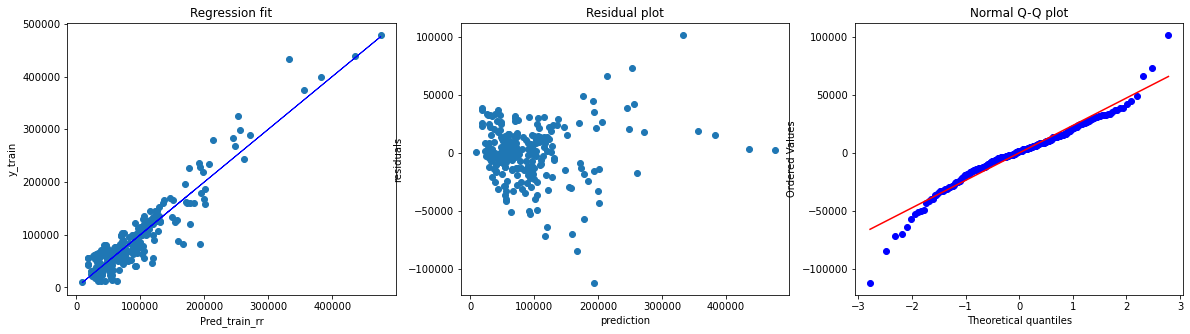

In [46]:
plt.figure(figsize=(20,5))
    
rr = Ridge(alpha=ridge_model.alpha_)
rr.fit(X_train_scaled,y_train)
pred = rr.predict(X_train_scaled)

plt.subplot(1, 3, 1)
plt.scatter(pred,y_train)
plt.plot(pred, pred, color='blue',linewidth=1)
plt.title("Regression fit")
plt.xlabel("Pred_train_rr")
plt.ylabel("y_train")
    
plt.subplot(1, 3, 2)
res = y_train - pred
plt.scatter(pred, res)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals")
    
plt.subplot(1, 3, 3)
#Generates a probability plot of sample data against the quantiles of a 
# specified theoretical distribution 
stats.probplot(res, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")

Text(0.5, 1.0, 'Normal Q-Q plot')

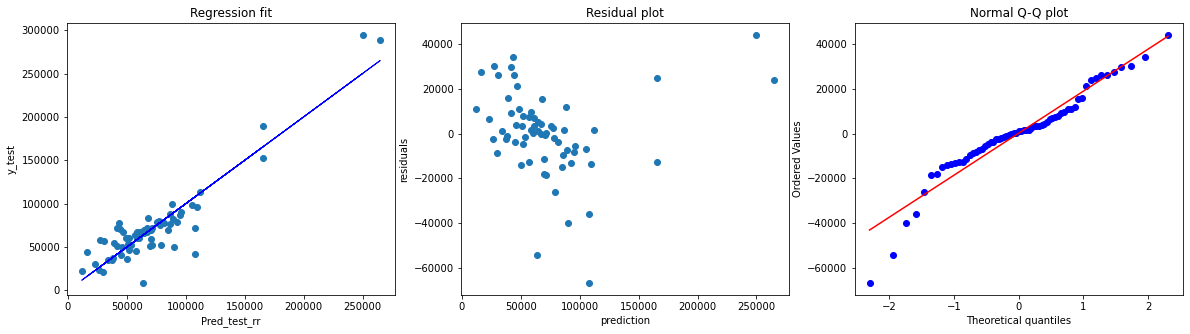

In [47]:
plt.figure(figsize=(20,5))
    
rr = Ridge(alpha=ridge_model.alpha_)
rr.fit(X_train_scaled,y_train)
pred = rr.predict(X_test_scaled)

plt.subplot(1, 3, 1)
plt.scatter(pred,y_test)
plt.plot(pred, pred, color='blue',linewidth=1)
plt.title("Regression fit")
plt.xlabel("Pred_test_rr")
plt.ylabel("y_test")
    
plt.subplot(1, 3, 2)
res = y_test - pred
plt.scatter(pred, res)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals")
    
plt.subplot(1, 3, 3)
#Generates a probability plot of sample data against the quantiles of a 
# specified theoretical distribution 
stats.probplot(res, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")